<a href="https://colab.research.google.com/github/cher16/FDSfE_ANjoku/blob/main/HW7/FDSfE_NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie Reviews:
## Data - 
the data comes from the Kaggla challenge https://www.kaggle.com/code/yagli18/sentiment-analysis-on-movie-reviews and is comprosed of ~10k movie reviews and associated ratings. 
The challenge there is to create a model that predicts the rating based on the review, which is a Natural Language Processing sentiment analysis task. Sentiment analysis measures the "sentiment" (typically in a positive-to-negative linear scale) of a text. There are many issues with sentiment analysis in genera, and in particulat here, the "sentiment" of the review (negative, which is associated with sad and angry for example) may not match with the judgement on the quality of the movie (which may be sad, but good if it is a drama) 

**We will simply apply a pre-trained model that weights each word in the text to measure its negative-to-positive sentiment and compounds all the words to get an overall sentiment. The right way to do this tho would be to _train_ a new model on the data, learning the match between the sentiment of the words and the rating assigned by the author of the review. That way, the model is _specific_ to this data. This is a challenge that I live for you!**

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=e0efcfc22c0582345770d73551ad51427885ff31f9fab1a07054907fbbe385e9
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [6]:
from nltk.tokenize import word_tokenize


In [7]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
import nltk
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

In [9]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [10]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.2 MB/s 


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [13]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [14]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [15]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [16]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip

sentimentanalysis:
sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [18]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [20]:
reviews = reviews.groupby("SentenceId").first()
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [21]:
reviews.shape

(8529, 3)

In [22]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [23]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [24]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

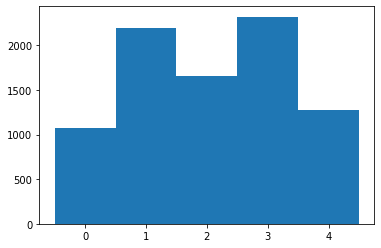

In [25]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"], bins=[-0.5,0.5,1.5,2.5,3.5,4.5]);

In [26]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# lets talk about the lambda construct and apply

In [27]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x: word_tokenize(x))# sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [28]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x: [word for word in x if word not in STOPWORDS]) # stop words removal


# Frequency of words

In [29]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

In [30]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if len(word)>3])


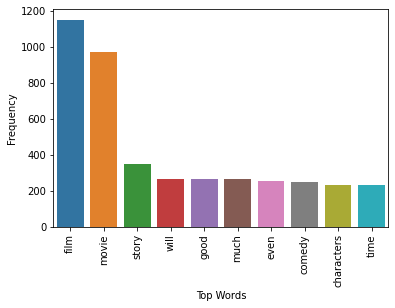

In [31]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 90); # Rotates X-Axis Ticks by 45-degrees


# Lets talk about the str.join() method

In [32]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) #Combines all words into 1 string
    plt.imshow(wc)
    plt.axis("off")



#TASK 1 : 
Use the function above to plot the word cloud **for Sentiment==0**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear

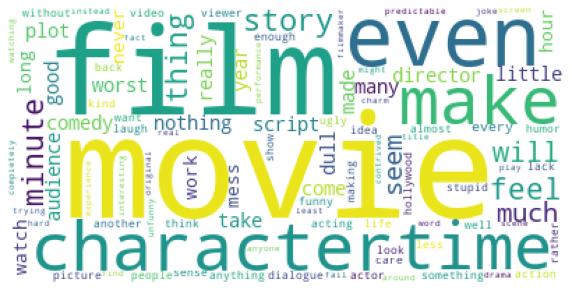

In [33]:
wc(reviews[reviews["Sentiment"]==0]["Phrase"].sum(), bgcolor="white")

#TASK 2 : 
Use the function above to plot the word cloud **for Sentiment==4**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear. How does it differ from Sentiment==0?

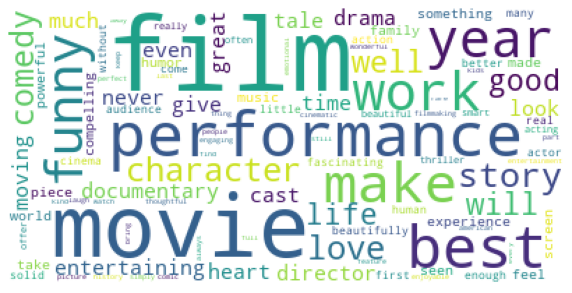

In [34]:
wc(reviews[reviews["Sentiment"]==4]["Phrase"].sum(), bgcolor="white")

# <mark>WFF</mark> Missing both figure captions.

# Task 3: sentiment analysis

install a package that contains a pretrained model: this model will score every word in a sentence as positive or negative (with a continuous score from -1 to 1) and will then average over those words.

In [117]:
#create a model
sid_obj = SentimentIntensityAnalyzer() 
#apply the model to a string
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [146]:
#define a function to generate the senriment given a string
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


## TASK steps: 
1. take the review for each Sentiment column value (you can use Sentiment==0, Sentiment==1..... like you should have done for the wordclouds) 
2. for each Sentiment group calculate the sentiment of each Phrase, the mean sentiment across the Phrases, and the standard deviation over this mean
3. plot on the x axis the value of the Sentiment column [0, 1, 2, 3, 4]
4. plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
5. include the errorbar on the measured sentiment (use plt.errorbar to do this)
6. Comment on the figure: what do you see? is the model good?

### hint: you may want to use a list comprehension to do this! the steps are not necessarily sequential: everything can be done with a single line of code. This is not required however

In [124]:
s0 = reviews[reviews["Sentiment"]==0]["Phrase"]
s0

SentenceId
32      [hampered, paralyzed, selfindulgent, script, a...
38      [movie, progression, rambling, incoherence, gi...
41      [tartakovsky, team, freakish, powers, visual, ...
53      [thanks, largely, williams, interesting, devel...
54      [comes, across, relic, bygone, convolutions, f...
                              ...                        
8495                                         [disgusting]
8500    [crossroads, feels, teenybopper, wood, film, r...
8508    [exciting, exoticism, might, sound, typical, v...
8514    [every, conceivable, mistake, director, make, ...
8539    [french, director, turned, nearly, hours, unfo...
Name: Phrase, Length: 1072, dtype: object

In [156]:
s0.apply(sentiment_vader)

SentenceId
32      0.0000
38     -0.7351
41     -0.1027
53      0.4215
54      0.0258
         ...  
8495   -0.5267
8500   -0.5267
8508    0.4939
8514   -0.3400
8539   -0.8885
Name: Phrase, Length: 1072, dtype: float64

In [192]:
s0mean = np.mean(s0.apply(sentiment_vader))

print("The mean of this group Sentiment==0 is {0:.3f}". format(s0mean))

The mean of this group Sentiment==0 is -0.101


In [191]:
s0std = np.std(s0.apply(sentiment_vader))

print("The standard deviation of this group Sentiment==0 is {0:.3f}". format(s0std))

The standard deviation of this group Sentiment==0 is 0.434


In [132]:
s1 = reviews[reviews["Sentiment"]==1]["Phrase"]
s1

SentenceId
1       [series, escapades, demonstrating, adage, good...
3       [even, fans, ismail, merchant, work, suspect, ...
5       [aggressive, selfglorification, manipulative, ...
7           [narratively, trouble, every, plodding, mess]
9                                           [leave, much]
                              ...                        
8534            [movie, deserve, energy, takes, describe]
8535                                         [case, zero]
8536    [simply, compelling, excuse, pair, susan, sara...
8542    [tries, parody, genre, already, joke, united, ...
8543     [movie, downfall, substitute, plot, personality]
Name: Phrase, Length: 2200, dtype: object

In [155]:
s1.apply(sentiment_vader)

SentenceId
1       0.8024
3      -0.3818
5      -0.1280
7      -0.6369
9      -0.0516
         ...  
8534    0.2732
8535    0.0000
8536    0.2960
8542    0.6124
8543    0.0000
Name: Phrase, Length: 2200, dtype: float64

In [190]:
s1mean = np.mean(s1.apply(sentiment_vader))

print("The mean of this group Sentiment==1 is {0:.3f}". format(s1mean))

The mean of this group Sentiment==1 is 0.046


In [189]:
s1std = np.std(s1.apply(sentiment_vader))

print("The standard deviation of this group Sentiment==1 is {0:.3f}". format(s1std))

The standard deviation of this group Sentiment==1 is 0.418


In [157]:
s2 = reviews[reviews["Sentiment"]==2]["Phrase"]
s2

SentenceId
18      [less, dizzily, gorgeous, companion, wong, moo...
20                          [everything, expect, nothing]
24      [chuck, norris, grenade, occurs, times, windta...
25      [plot, romantic, comedy, boilerplate, start, f...
26      [arrives, impeccable, pedigree, mongrel, almos...
                              ...                        
8526    [santa, clause, barely, adequate, babysitter, ...
8531               [even, interest, ganginfested, eastvs]
8540           [either, willing, claustrophobic, concept]
8541    [despite, annoyances, capable, clayburgh, tamb...
8544    [film, darkly, atmospheric, herrmann, quietly,...
Name: Phrase, Length: 1655, dtype: object

In [158]:
s2.apply(sentiment_vader)

SentenceId
18      0.8369
20      0.0000
24      0.4404
25      0.6369
26      0.0000
         ...  
8526    0.1548
8531    0.4588
8540    0.0000
8541    0.7303
8544   -0.8074
Name: Phrase, Length: 1655, dtype: float64

In [188]:
s2mean = np.mean(s2.apply(sentiment_vader))

print("The mean of this group Sentiment==2 is {0:.3f}". format(s2mean))

The mean of this group Sentiment==2 is 0.118


In [187]:
s2std = np.std(s2.apply(sentiment_vader))

print("The standard deviation of this group Sentiment==2 is {0:.3f}". format(s2std))

The standard deviation of this group Sentiment==2 is 0.409


In [163]:
s3 = reviews[reviews["Sentiment"]==3]["Phrase"]
s3

SentenceId
4       [positively, thrilling, combination, ethnograp...
8       [importance, earnest, thick, plays, reading, b...
14      [fresnadillo, something, serious, ways, extrav...
15      [still, moonlight, mile, better, judgment, dam...
16      [welcome, relief, baseball, movies, hard, myth...
                              ...                        
8528    [makes, believe, cast, crew, thoroughly, enjoy...
8529    [underworld, urban, angst, derivative, martin,...
8533    [proves, servicable, world, drama, totally, hi...
8537    [definitely, guilty, pleasure, bmovie, categor...
8538    [experience, understanding, unique, culture, p...
Name: Phrase, Length: 2321, dtype: object

In [164]:
s3.apply(sentiment_vader)

SentenceId
4      -0.8860
8       0.7783
14      0.3182
15      0.0772
16      0.9022
         ...  
8528    0.5563
8529    0.0000
8533   -0.7178
8537    0.8378
8538    0.0000
Name: Phrase, Length: 2321, dtype: float64

In [186]:
s3mean = np.mean(s3.apply(sentiment_vader))

print("The mean of this group Sentiment==1 is {0:.3f}". format(s3mean))

The mean of this group Sentiment==1 is 0.294


In [184]:
s3std = np.std(s3.apply(sentiment_vader))

print("The standard deviation of this group Sentiment==0 is {0:.3f}". format(s3std))

The standard deviation of this group Sentiment==0 is 0.413


In [170]:
s4 = reviews[reviews["Sentiment"]==4]["Phrase"]
s4

SentenceId
2       [quiet, introspective, entertaining, independe...
6       [comedydrama, nearly, epic, proportions, roote...
13                               [performances, absolute]
21                                    [best, indie, year]
43      [horror, movie, primary, goal, frighten, distu...
                              ...                        
8502    [mike, leigh, populates, movie, wonderful, ens...
8513    [gracious, eloquent, film, offers, hope, refug...
8515    [kind, movie, aside, robert, altman, spike, co...
8516    [williams, creates, stunning, taxi, driveresqu...
8522                                [exhilarating, funny]
Name: Phrase, Length: 1281, dtype: object

In [171]:
s4.apply(sentiment_vader)

SentenceId
2       0.5859
6      -0.3400
13      0.0000
21      0.6369
43     -0.7717
         ...  
8502    0.2960
8513    0.6369
8515    0.5267
8516    0.5719
8522    0.6808
Name: Phrase, Length: 1281, dtype: float64

In [185]:
s4mean = np.mean(s4.apply(sentiment_vader))

print("The mean of this group Sentiment==4 is {0:.3f}". format(s4mean))

The mean of this group Sentiment==4 is 0.432


In [183]:
s4std = np.std(s4.apply(sentiment_vader))

print("The standard deviation of this group Sentiment==4 is {0:.3f}". format(s4std))

The standard deviation of this group Sentiment==4 is 0.387


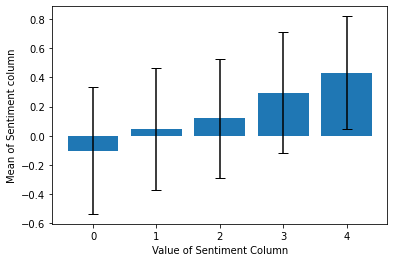

In [223]:
xAxis = [0,1,2,3,4]
yAxis = [s0mean, s1mean, s2mean, s3mean, s4mean]
yerr = [s0std, s1std, s2std, s3std, s4std]


fig, ax = plt.subplots()

ax.bar(xAxis, yAxis,yerr= yerr, ecolor="black", capsize=5);
ax.set_xticks(xAxis)
plt.xlabel("Value of Sentiment Column");
plt.ylabel("Mean of Sentiment column");


#*Graph of the Mean of Sentiment Column against Value of Sentiment Column*

This graph helps to show the variability of data across the Sentiment columns. The mean of the sentiment columns are represented by the blue bars. The error bars are in black and they help to show the confidence in a set. The error bars depict how the individual observations vary across the dataset. The error bars across the column values overlap and it points toward the conclusion that there is not much statistical difference to their precision of data.

# <mark>WFF</mark> My first thought would not have been to use a bar chart for this plot, but actually I think it works here. Reach out to me if you would like to know more about this.